#Table of Contents
* [Import pixel data of the membrane thickness](#Import-pixel-data-of-the-membrane-thickness)
* [Convert pixel to micro](#Convert-pixel-to-micro)
* [Calculate average](#Calculate-average)
* [Calculate standard deviation](#Calculate-standard-deviation)
* [Create array for each resin](#Create-array-for-each-resin)
* [Plot 1% Irgacure, 0.5% Avobenzone, 0.5% Octocrylene](#Plot-1%-Irgacure,-0.5%-Avobenzone,-0.5%-Octocrylene)
* [Plot of 1% Irgacure, 0.1% BTEX](#Plot-of-1%-Irgacure,-0.1%-BTEX)
* [Compare data](#Compare-data)
	* [Irgacure 1% and UV-326 1%](#Irgacure-1%-and-UV-326-1%)
	* [Commercial Resin](#Commercial-Resin)
* [Calculate predicted $h_a$ for new resin formulations](#Calculate-predicted-$h_a$-for-new-resin-formulations)
* [To do](#To-do)


In [18]:
import math
#import time
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
%matplotlib inline
#import sys
import numpy as np
#import collections
#import os
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from __future__ import division
from __future__ import print_function

In [3]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

# Import pixel data of the membrane thickness

The first 4 columns is from meamsurement of 0.5% Avobenzone + 0.5% Octcrylene + 1% Ingacure, 2s, 1s, 0.5s, 0.25s;

The latter 4 columns is from meamsurement of 0.1% BTEX + 1% Ingacure, 2s, 1s, 0.5s, 0.25s.

In [4]:
membthick_pixel = np.loadtxt("membrane thickness pixels.csv", delimiter=",")
print membthick_pixel
print "0 means membrane is broken, no data acquired."

[[ 605.     312.     223.002   89.     353.     221.     119.      39.   ]
 [ 596.     404.     215.      75.     384.     220.     121.004   26.   ]
 [ 618.     389.     218.      79.     391.001  215.002  123.      24.   ]
 [ 611.     401.     223.      71.     381.     212.     132.004   18.   ]
 [ 620.     413.001  234.     101.     364.     217.     106.      28.018]
 [ 603.     422.001  212.002    0.     376.001  207.     107.       0.   ]]
0 means membrane is broken, no data acquired.


# Convert pixel to micro

In [5]:
# 1.8244 for x-axis, 1.9364 for y-axis, calibration from Chad's excel file
membthick_micro = membthick_pixel * 1.8244
print membthick_micro

[[ 1103.762       569.2128      406.8448488   162.3716      644.0132
    403.1924      217.1036       71.1516   ]
 [ 1087.3424      737.0576      392.246       136.83        700.5696
    401.368       220.7596976    47.4344   ]
 [ 1127.4792      709.6916      397.7192      144.1276      713.3422244
    392.2496488   224.4012       43.7856   ]
 [ 1114.7084      731.5844      406.8412      129.5324      695.0964
    386.7728      240.8280976    32.8392   ]
 [ 1131.128       753.4790244   426.9096      184.2644      664.0816
    395.8948      193.3864       51.1160392]
 [ 1100.1132      769.8986244   386.7764488     0.          685.9762244
    377.6508      195.2108        0.       ]]


# Calculate average

In [6]:
membthick_ave = np.average(membthick_micro, axis=0).reshape((4,2), order='F')

# correct result with 0 in data
membthick_ave[3,0] = np.average(membthick_micro[:5,3])
membthick_ave[3,1] = np.average(membthick_micro[:5,7])

membthick_Avo = membthick_ave[:,0]
membthick_BTEX = membthick_ave[:,1]

print "Avobenzone"
print membthick_Avo
print "BTEX"
print membthick_BTEX

Avobenzone
[ 1110.75553333   711.8206748    402.8895496    151.4252    ]
BTEX
[ 683.84654147  392.85474147  215.28163253   49.26536784]


# Calculate standard deviation

In [7]:
membthick_std = np.std(membthick_micro, axis=0).reshape((4,2), order='F')

# correct result with 0 in data
membthick_std[3,0] = np.std(membthick_micro[:5,3])
membthick_std[3,1] = np.std(membthick_micro[:5,7])

membthick_std_Avo = membthick_std[:,0]
membthick_std_BTEX = membthick_std[:,1]

print "Avobenzone"
print membthick_std_Avo
print "BTEX"
print membthick_std_BTEX

Avobenzone
[ 15.38769616  66.42980313  12.96066121  19.71702944]
BTEX
[ 23.30271396   8.72831309  16.58994011  12.53500244]


# Create array for each resin

In [8]:
xpstime = np.array([2, 1, 0.5, 0.25])

Avobenzone = np.array([xpstime,membthick_Avo,membthick_std_Avo]).T
BTEX = np.array([xpstime,membthick_BTEX,membthick_std_BTEX]).T

print "Avobenzone"
print Avobenzone
print "BTEX"
print BTEX

Avobenzone
[[  2.00000000e+00   1.11075553e+03   1.53876962e+01]
 [  1.00000000e+00   7.11820675e+02   6.64298031e+01]
 [  5.00000000e-01   4.02889550e+02   1.29606612e+01]
 [  2.50000000e-01   1.51425200e+02   1.97170294e+01]]
BTEX
[[  2.00000000e+00   6.83846541e+02   2.33027140e+01]
 [  1.00000000e+00   3.92854741e+02   8.72831309e+00]
 [  5.00000000e-01   2.15281633e+02   1.65899401e+01]
 [  2.50000000e-01   4.92653678e+01   1.25350024e+01]]


# Plot 1% Irgacure, 0.5% Avobenzone, 0.5% Octocrylene

In [9]:
def membthickfunc(t,a,b):
    return a*np.log(t/b)

In [10]:
fitpars, covmat = curve_fit(membthickfunc, Avobenzone[:,0], Avobenzone[:,1])
std_devs = np.sqrt(covmat.diagonal())

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


In [11]:
print('fit params:', fitpars)
print('    stdevs:', std_devs)

('fit params:', array([  4.59775674e+02,   1.94175591e-01]))
('    stdevs:', array([  3.38028732e+01,   2.15130715e-02]))


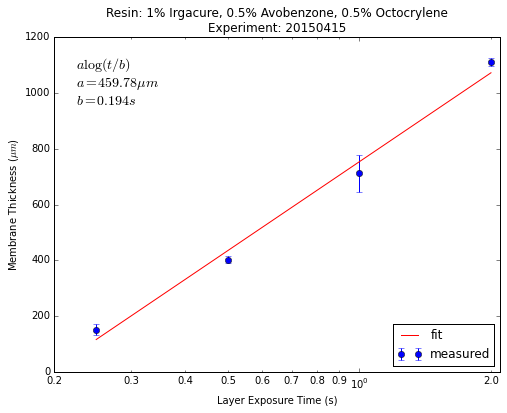

In [136]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log')
ax.errorbar(Avobenzone[:,0], Avobenzone[:,1], Avobenzone[:,2], linestyle='None', marker='o', label='measured')
ax.plot(xpstime, membthickfunc(Avobenzone[:,0],*fitpars), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,2.1)
ax.legend(loc=4)
fittext = '$a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(fitpars[0],fitpars[1])
ax.text(0.05, 0.95, fittext, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.5% Avobenzone, 0.5% Octocrylene\nExperiment: 20150415')
fig.savefig('G_150415_Avobenzone.png');

# Plot of 1% Irgacure, 0.1% BTEX

In [12]:
xpstime = np.array([2, 1, 0.5, 0.25])

fitpars2, covmat2 = curve_fit(membthickfunc, BTEX[:,0], BTEX[:,1])
std_devs2 = np.sqrt(covmat.diagonal())

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


In [13]:
print('fit params:', fitpars2)
print('    stdevs:', std_devs2)

('fit params:', array([  3.00270518e+02,   2.31477284e-01]))
('    stdevs:', array([  3.38028732e+01,   2.15130715e-02]))


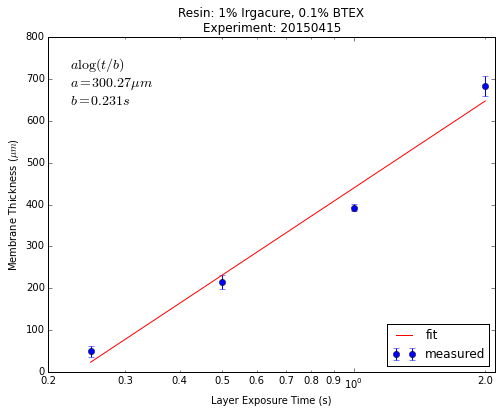

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log')
ax.errorbar(BTEX[:,0], BTEX[:,1], BTEX[:,2], linestyle='None', marker='o', label='measured')
ax.plot(BTEX[:,0], membthickfunc(BTEX[:,0],*fitpars2), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,2.1)
ax.legend(loc=4)
fittext = '$a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(fitpars2[0],fitpars2[1])
ax.text(0.05, 0.95, fittext, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 0.1% BTEX\nExperiment: 20150415')
fig.savefig('G_150415_BTEX.png');

# Compare data

## Irgacure 1% and UV-326 1%

In [15]:
fitpars2

array([  3.00270518e+02,   2.31477284e-01])

In [124]:
UV326 = np.loadtxt('Exp150330_Irgacure_1.0_UV326_1.0_.csv', delimiter=',', skiprows=1)
print UV326

[[   0.3    54.5     9.49]
 [   0.35  105.7    15.94]
 [   0.4   127.62   13.19]
 [   0.45  185.95   15.6 ]
 [   0.5   197.56   16.36]]


In [130]:
fitpars3 = np.array([2.88233065e+02, 2.47048025e-01])
stdevs3 = np.array([2.71746517e+01, 1.16362149e-02])

## Commercial Resin

In [126]:
Commercial = np.loadtxt('Exp150410_commercialresin_.csv', delimiter=',', skiprows=1)
print Commercial

[[   1.    133.5    15.05]
 [   1.5   195.5    12.34]
 [   2.    294.66   66.92]
 [   3.    358.25   15.6 ]]


In [127]:
fitpars4 = np.array([213.56714283, 0.54875133])
stdevs4 = np.array([24.28841407, 0.07598341])

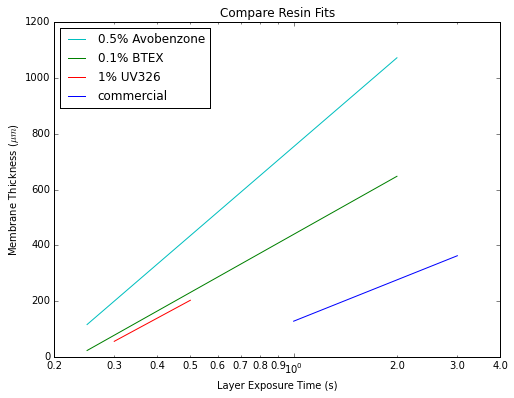

In [138]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log')
ax.plot(Avobenzone[:,0], membthickfunc(Avobenzone[:,0],*fitpars), 'c-', label='0.5% Avobenzone')
ax.plot(BTEX[:,0], membthickfunc(BTEX[:,0],*fitpars2), 'g-', label='0.1% BTEX')
ax.plot(UV326[:,0], membthickfunc(UV326[:,0],*fitpars3), 'r-', label='1% UV326')
ax.plot(Commercial[:,0], membthickfunc(Commercial[:,0],*fitpars4), 'b-', label='commercial')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,4.0)
ax.legend(loc=2)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Compare Resin Fits')

plt.savefig("compare.png")
plt.show()

# Calculate predicted $h_a$ for new resin formulations

In [26]:
absorp_coeff_01BTX_05Avo = 1.0/460 + 1.0/300.
print('0.1% BTX 0.5% Avobenzone: alpha = {0}, h_a = {1} um'.format(absorp_coeff_01BTX_05Avo, 1.0/absorp_coeff_01BTX_05Avo))
absorp_coeff_02BTX = 2.0 * (1.0/300)
print('                0.2% BTX: alpha = {0}, h_a = {1} um'.format(absorp_coeff_02BTX, 1.0/absorp_coeff_02BTX))
absorp_coeff_02BTX_05Avo = 1.0/460 + 2.0/300.
print('0.2% BTX 0.5% Avobenzone: alpha = {0}, h_a = {1} um'.format(absorp_coeff_02BTX_05Avo, 1.0/absorp_coeff_02BTX_05Avo))
absorp_coeff_03BTX = 3.0 * (1.0/300)
print('                0.3% BTX: alpha = {0}, h_a = {1} um'.format(absorp_coeff_03BTX, 1.0/absorp_coeff_03BTX))

0.1% BTX 0.5% Avobenzone: alpha = 0.00550724637681, h_a = 181.578947368 um
                0.2% BTX: alpha = 0.00666666666667, h_a = 150.0 um
0.2% BTX 0.5% Avobenzone: alpha = 0.00884057971014, h_a = 113.114754098 um
                0.3% BTX: alpha = 0.01, h_a = 100.0 um


# To do

- Plot measured membrane thickness vs normalized layer exposure time using $T_c$'s from the fitted curves and show them all together and with calculated curves from 150324_abs_calcs.ipynb
- Plot data for [20150401 ASIGA Dose Response and Valves](https://nanomicro.byu.edu:3456/maingroup/12012). Add it to data from 20150330 membrane thickness measurements?